# This is a tutorial on saving figures to a file
I will show how to:
- Save plot to your computer
- Save as either a raster (.jpeg, .png) or vector (.pdf, .eps)
- How to adjust the size of your saved plot

## Part 1 - Saving in matplotlib or seaborn

Import our libraries (pandas for loading data, matplotlib and seaborn for plotting)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load our Palmer penguins data as a Pandas dataframe

In [2]:
penguins = pd.read_csv("../Data/palmerpenguins.csv")

Create a scatterplot in `matplotlib` comparing Flipper Length vs Body Mass in our `penguins` dataframe.

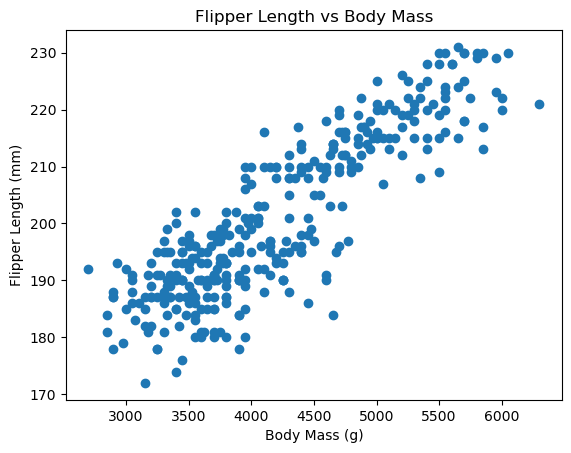

In [3]:
plt.scatter(penguins['body_mass_g'],
            penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
plt.show()

### How to save, and change resolution 
___

We can save our figure using `plot.savefig()` 

We can pass a number of arguments to `plot.savefig()` to customize our saved plot.

For example: `plot.savefig('plot.png', dpi=300)`

In the above example we have two arguments:
- **Filename:** The plot filename, `plot.png`. You can change the type of image file by changing the extension. If you prefer to save as a **.pdf** then you would use `plot.pdf`. 
- **dpi (optional)** DPI stands for Dots Per Inch, and refers to the resolution of the image. **300** dpi is the standard for print images, so anything that will be published in a journal. **72** dpi is the standard for images that will be shared on the web. *If you don't provide a value, matplotlib will use the default **100** dpi.*

For all possible arguments, view the documentation for `savefig`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

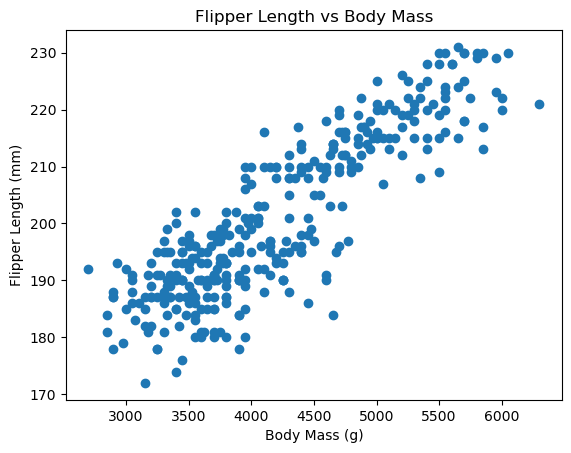

In [18]:
plt.scatter(penguins['body_mass_g'],
            penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
# Save our figure to the same directory that our 
# jupyter notebook is running in
plt.savefig("penguins_example_1.png", dpi = 72)

### Change the dimension of our plot
___

We can change the dimensions of the plot by changing the size of our figure (the "easel" for our canvas) before creating our plot using: `plt.figure(figsize=(width, height))`
- **figsize:** `figsize(width, height)` controls with width and height (in inches) of the plot. Remember that the DPI controls how many dots are used per inch, so the higher the dpi, the larger the image will be on your computer screen, since each dot will be represented by a pixel, which is a fixed size. For example, 

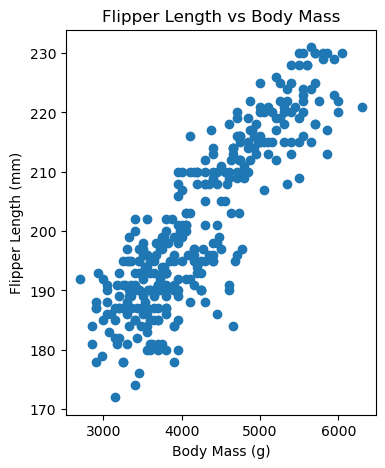

In [19]:
# Set the width of the figure to 4 inches, 
# and the height to 5 inches
plt.figure(figsize=(4,5))

# Create our scatterplot
plt.scatter(penguins['body_mass_g'],
            penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
# Save our figure to the same directory that our 
# jupyter notebook is running in
plt.savefig("penguins_example_2.png", dpi = 72)

### My saved plot was just white, with no content, what happened?
___

If we try to save the figure after calling `plt.show()`, with `%matplotlib inline` enabled, it will only save an empty white rectangle instead of our plot. 

`plt.show()` will display and then close the `plt`, removing it from memory, so when we try to save it with `plt.savefig()`, no `plt` graphic is found!  This is specific to **jupyter notebook**. If your are running your Python code in a .py script, `plt.show()` will open your plot in a new window. Calling `plt.savefig()` after `plt.show()` will work unless you close the plot window, which will cause it to be removed from memory.

Think of `plt.show()` as the final step of the painting process in my Bob Ross painting example. Bob has added a canvas to his easel, created a beautiful nature landscape while narrating in his dulcimer tones, and when he was done he took the painting off the easel, showed it to the audience, and set it aside. So if he tries to do anything else with the painting, he can't, its done and removed from his easel!

`plt.savefig()` is similar, if there is no painting on our "easel" because it's been removed from memory by `plt.show()` then we can't save it to disc!

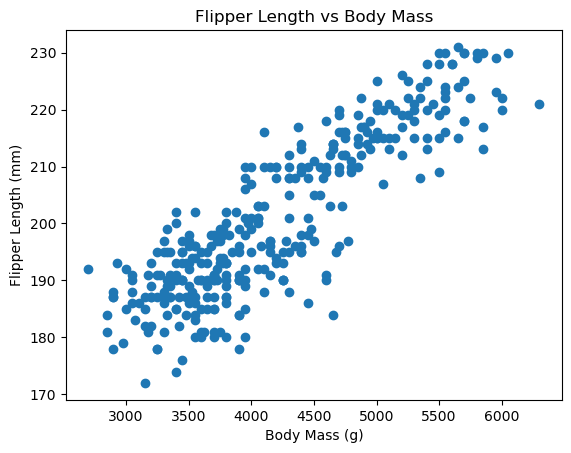

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(penguins['body_mass_g'],
            penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
# Display the plot, which will also remove the plot from memory
plt.show()
# savefig() won't work, the plt is gone, so it will only print a
# white rectangle 
plt.savefig("penguins_example_3.png")

One way to get around this issue is to save our plot to a variable `penguins_scatterplot`, extract the figure from that plot, and then save the resulting figure. 

This is helpful when we are automating plotting (looping through a dataframe and creating lots of plots) and we want to guarantee they will save correctly.

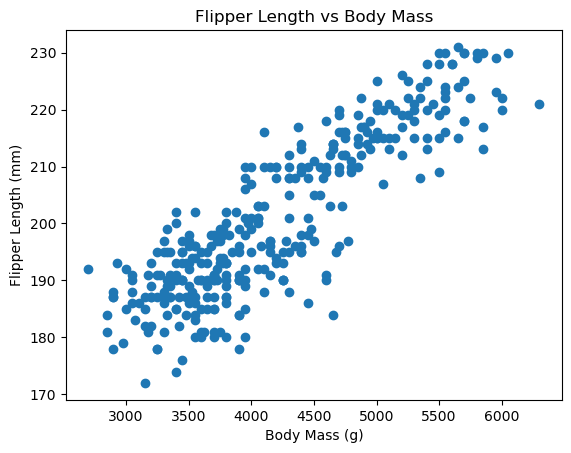

In [30]:
# Save our plot to a varible `penguins_scatterplot`
penguins_scatterplot = plt.scatter(penguins['body_mass_g'], penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
plt.show()

scatter_fig = penguins_scatterplot.get_figure()
scatter_fig.savefig("penguins_example_4.png")

### How to save to another location
___

The first argument to `savefig()` takes a string filename that you would like to save your plot as, for example `plt.savefig("penguins-scatterplot.png")`

By default it will save to the same location as your running Jupyter notebook. To specify a different location, you need to add the filepath to that location. For example, I want to save my plot in a plots folder in the previous directory. 

To do so, I would use `..` to indicate one directory up relative to my current directory. Then I could use `plt.savefig("../plots/penguins-scatterplot.png")` to save the plot one directory up, and then within the plots folder within that directory. 

I can also specify exactly where I want my plot to go by using the whole filepath: `plt.savefig("C:/Users/plawson6/Documents/jhu-dev/intro-to-data-visualization-in-python/plots/penguins-scatterplot.png")`

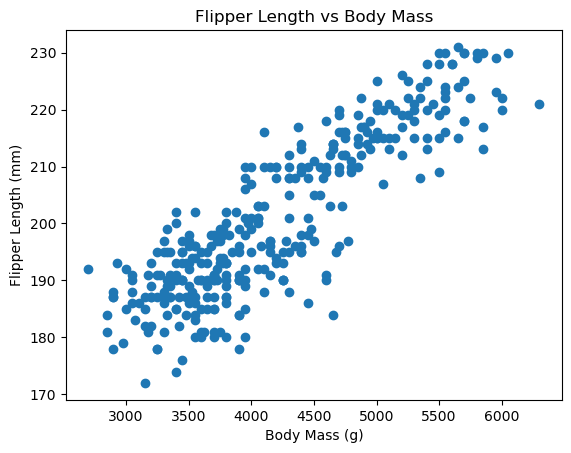

In [26]:
plt.scatter(penguins['body_mass_g'],
            penguins['flipper_length_mm'])
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
plt.savefig("C:/Users/plawson6/Documents/jhu-dev/intro-to-data-visualization-in-python/plots/penguins-scatterplot.png")

### Wait, what about `seaborn` plots?! How do we save those?
___

Since `seaborn` is built on `matplotlib` we use the save `plt.savefig('myplot.png')` command!

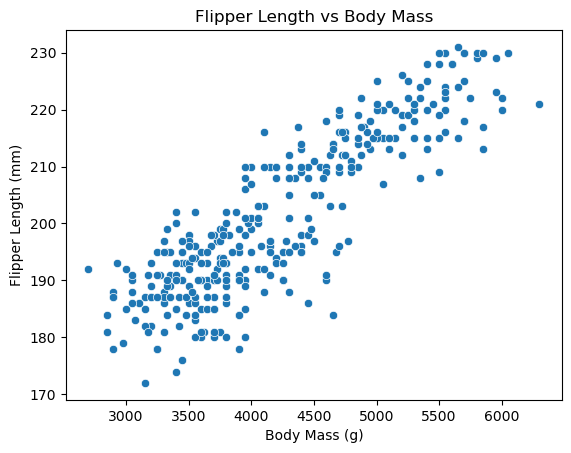

In [36]:
sns.scatterplot(x = 'body_mass_g',
                y = 'flipper_length_mm',
                data = penguins)
plt.title("Flipper Length vs Body Mass")
plt.ylabel("Flipper Length (mm)")
plt.xlabel("Body Mass (g)")
plt.savefig("penguins_example_5.png")